## 질병관리본부 메인페이지 워드클라우드 (4.27일)

In [2]:
import pandas as pd
import lxml.html
import requests

In [3]:
res = requests.get('http://ncov.mohw.go.kr/')

In [4]:
root = lxml.html.fromstring(res.text)

In [5]:
content = root.cssselect('[class="wrap nj"]')[0].text_content()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [7]:
tdm = cv.fit_transform([content]).toarray()

In [8]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [9]:
df.sort_values('freq',ascending=False)

,word,freq
401,확진자,36
348,증감,19
204,대비,19
251,비율누적,18
326,전국대비,18
...,...,...
149,격리해제35명사망자2명10만명당,1
148,격리해제35명사망자0명10만명당,1
147,격리해제34명사망자0명10만명당,1
146,격리해제25명사망자0명10만명당,1


In [10]:
from wordcloud import WordCloud

In [11]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

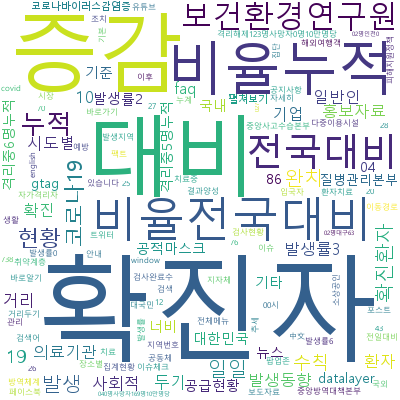

In [12]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',width=400, height=400, background_color='white',)

wc.fit_words(frequencies)

wc.to_image()

## 질병관리본부 최신브리핑 워드클라우드 (4.27일)

In [13]:
res = requests.get('http://ncov.mohw.go.kr/tcmBoardView.do?contSeq=354238')
root = lxml.html.fromstring(res.text)
content = root.cssselect('[class="bvc_txt"]')[0].text_content()

In [14]:
cv = CountVectorizer()

tdm = cv.fit_transform([content]).toarray()

df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

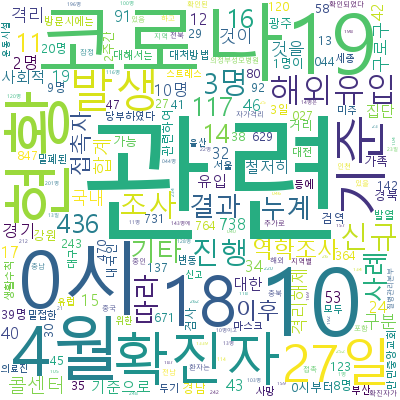

In [15]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',width=400, height=400, background_color='white',)

wc.fit_words(frequencies)

wc.to_image()

## 뉴스기사 워드클라우드

In [16]:
res = requests.get('https://www.yna.co.kr/view/AKR20200427051451017?input=1195m')
root = lxml.html.fromstring(res.text)
content = root.cssselect('[class="story-news article"]')[0].text_content()

In [17]:
cv = CountVectorizer()

tdm = cv.fit_transform([content]).toarray()

df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

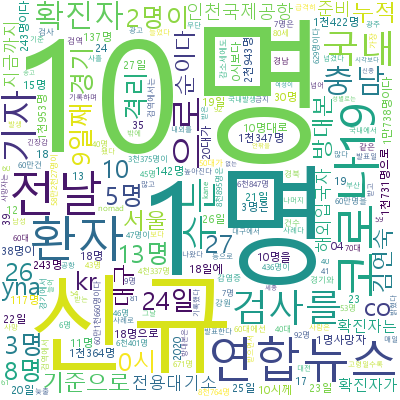

In [18]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',width=400, height=400, background_color='white',)

wc.fit_words(frequencies)

wc.to_image()

## 데이터 표 스크랩

In [41]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [42]:
browser = webdriver.Chrome('E:/tj/jupyter_notebook/chromedriver.exe')
browser.get("http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=11&ncvContSeq=&contSeq=&board_id=&gubun=")
 
result_html = browser.page_source
result_soup = BeautifulSoup(result_html, 'html.parser')
tags = result_soup.find_all("div", attrs={"class":"data_table"})[-1]
Time = result_soup.find_all("span", attrs={"class":"title_info"})[0]

In [25]:
#!pip install html_table_parser

Processing c:\users\tj\appdata\local\pip\cache\wheels\8b\db\ba\ffbb0a5dcb78fd955a33d26295a77ced593e712a7d8a4a0dc6\html_table_parser-0.1.0-py3-none-any.whl
  Using cached beautifulsoup4-4.4.1-py3-none-any.whl (81 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.0
    Uninstalling beautifulsoup4-4.9.0:
      Successfully uninstalled beautifulsoup4-4.9.0


In [43]:
from html_table_parser import parser_functions as parser
html_table = parser.make2d(tags)

In [44]:
df=pd.DataFrame(html_table[1:], columns=html_table[0])

In [45]:
df

,구분,확진자(%),사망자(%),치명률(%)
0,80 이상,485 (4.52),116 (47.74),23.92
1,70-79,708 (6.59),72 (29.63),10.17
2,60-69,"1,347 (12.54)",35 (14.40),2.6
3,50-59,"1,953 (18.19)",15 (6.17),0.77
4,40-49,"1,422 (13.24)",3 (1.23),0.21
5,30-39,"1,152 (10.73)",2 (0.82),0.17
6,20-29,"2,943 (27.41)",0 (0.00),-
7,10-19,588 (5.48),0 (0.00),-
8,0-9,140 (1.3),0 (0.00),-


In [46]:
#숫자로 변환
for i in range(9):
    df['확진자(%)'][i] = df['확진자(%)'][i].split('\xa0')[0].replace(',','')
    df['사망자(%)'][i] = df['사망자(%)'][i].split('\xa0')[0].replace(',','')


In [47]:
import matplotlib.pyplot as plt  

### 나이 별 확진자

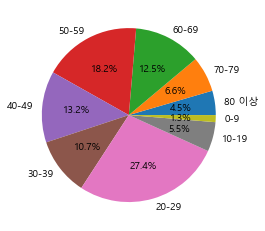

In [48]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.pie(df['확진자(%)'].astype('int'),labels=df['구분'],autopct='%0.1f%%')
plt.show()

### 나이 별 사망자

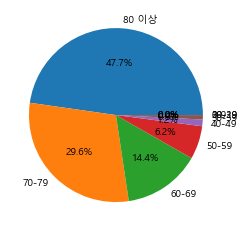

In [49]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.pie(df['사망자(%)'].astype('int'),labels=df['구분'],autopct='%0.1f%%')
plt.show()